# Unsupervised Learning - Association


Association is a rule-based unsupervised learning method used to diacover interesting relationship between variables in a large dataset.

**Key Concepts**
- Itemset
- Transaction
- Rule

#Key Metrics in Association Rules
- Support: Measures how frequently an itemset appears in the dataset.

Example: If {Milk, Bread} appears in 3 out 10 transactions, Support({Milk, Bread}) = 0.3
- Confidence: Measures the likelihood of Y being bought when X is bought.

Example: if {Milk, Bread} & {Eggs} has a confidence of 0.6. it means 60% of the time, Eggs are bought with Milk and Bread.
- Lift: Measures the strength of the association rule compare to the expected probability interpretation.

Interpretation:
- Lift > 1: Positive Correlation.
- Lift = 1: No Correlation.
- Lift < 1: Negative Correlation.

# Apriori Algorithm

The Apriori algorithm is used to generate association rules by identifying frequent itemsets and deriving rules from them.

# Steps:
- Generate all frequent itemsets with support >= minimum support threshold.
- Generate rules from the itemsets with confidence >= minimum confidence threshold.
- Prune rules based on lift or other metrics.

# Uses Cases of Association Rules
- Market Basket Analysis: Identify products frequently bought together.
- Recommendation Systems: Suggest products based on user behavior.
- HealthCare: Discover co-occuring symptoms or treatments.
- Web Usage Mining: Analyze user behavior on websites.

# Project Case Study: Market Basket Analysis for an Online Store

**Problem Statement**

An online retail store wants to analyze customer purchase behavior to identify frequently bought items and improve cross_selling strategies.

In [ ]:
 import pandas as pd
 from mlxtend.frequent_patterns import apriori, association_rules

 df = pd.read_csv('/content/Groceries_dataset.csv')
 df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


**Preprocess the Data**

In [ ]:
# Convert transactions to a list of lists
transactions = df.groupby("Member_number")["itemDescription"].apply(list).values.tolist()

print(transactions[:10])

[['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack'], ['frankfurter', 'frankfurter', 'beef', 'sausage', 'whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda', 'whipped/sour cream', 'rolls/buns'], ['tropical fruit', 'butter milk', 'butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk', 'other vegetables'], ['sausage', 'root vegetables', 'rolls/buns', 'detergent', 'frozen meals', 'rolls/buns', 'dental care', 'rolls/buns'], ['other vegetables', 'pip fruit', 'root vegetables', 'canned beer', 'rolls/buns', 'whole milk', 'other vegetables', 'hygiene articles', 'whole milk', 'whole milk', 'frozen fish', 'red/blush wine', 'chocolate', 'shopping bags', 'dish cleaner', 'packaged fruit/vegetables', 'tropical fruit', 'rolls/buns', 'cling film/bags', 'chocolate', 'pastry'], ['whipped/sour cream', 'rolls/buns', 'margarine', 'rol

# Encode Transactions

Convert the transaction data into a binary matrix format, where each row represents a transaction and each column represents an item.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(df_encoded.head())

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False   True    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

# Apply Apriori Algorithm
- Purpose: Identify frequent itemsets in the dataset. Frequent itemsets are set of items that appear together in the transactions dataframe more frequently than a specified threshold.(Min_Support).

In [ ]:
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets
frequent_items = apriori(df_encoded, min_support = 0.05, use_colnames = True)

print(frequent_items)

      support                                        itemsets
0    0.078502                                      (UHT-milk)
1    0.119548                                          (beef)
2    0.079785                                       (berries)
3    0.062083                                     (beverages)
4    0.158799                                  (bottled beer)
..        ...                                             ...
160  0.050539  (other vegetables, tropical fruit, whole milk)
161  0.071832          (other vegetables, yogurt, whole milk)
162  0.065162                  (soda, rolls/buns, whole milk)
163  0.065931                (rolls/buns, yogurt, whole milk)
164  0.054387                      (yogurt, whole milk, soda)

[165 rows x 2 columns]


# Confidence
- Measures the likelihood of Y being bought when X is bought

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_items, metric = "confidence", min_threshold = 0.1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,1.0,0.005773,1.017719,0.182309,0.114055,0.017410,0.279885
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,1.0,0.005773,1.083966,0.129082,0.114055,0.077462,0.279885
2,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
3,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
4,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,1.0,0.009720,1.225537,0.198033,0.108495,0.184031,0.338298
256,"(soda, whole milk)",(yogurt),0.151103,0.282966,0.054387,0.359932,1.271999,1.0,0.011630,1.120247,0.251899,0.143243,0.107340,0.276068
257,(yogurt),"(soda, whole milk)",0.282966,0.151103,0.054387,0.192203,1.271999,1.0,0.011630,1.050879,0.298223,0.143243,0.048416,0.276068
258,(whole milk),"(yogurt, soda)",0.458184,0.097486,0.054387,0.118701,1.217622,1.0,0.009720,1.024073,0.329867,0.108495,0.023507,0.338298


**Lift Measures the strength of the association rule compare to the expected probability**

In [ ]:
rules_lift = association_rules(frequent_items, metric="lift", min_threshold=1)

rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,1.0,0.005773,1.017719,0.182309,0.114055,0.017410,0.279885
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,1.0,0.005773,1.083966,0.129082,0.114055,0.077462,0.279885
2,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
3,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
4,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,1.0,0.009720,1.225537,0.198033,0.108495,0.184031,0.338298
254,"(soda, whole milk)",(yogurt),0.151103,0.282966,0.054387,0.359932,1.271999,1.0,0.011630,1.120247,0.251899,0.143243,0.107340,0.276068
255,(yogurt),"(soda, whole milk)",0.282966,0.151103,0.054387,0.192203,1.271999,1.0,0.011630,1.050879,0.298223,0.143243,0.048416,0.276068
256,(whole milk),"(yogurt, soda)",0.458184,0.097486,0.054387,0.118701,1.217622,1.0,0.009720,1.024073,0.329867,0.108495,0.023507,0.338298


In [ ]:
# Filter rules with lift > 1 and confidence > 0.4

filtered_rules = rules[(rules["lift"] > 1) & (rules["confidence"] > 0.4)]

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,1.0,0.005773,1.083966,0.129082,0.114055,0.077462,0.279885
3,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
4,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
10,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
13,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,1.0,0.013414,1.111969,0.181695,0.189147,0.100694,0.344347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,"(rolls/buns, soda)",(whole milk),0.119805,0.458184,0.065162,0.543897,1.187072,1.0,0.010269,1.187926,0.179041,0.127064,0.158197,0.343057
243,"(whole milk, soda)",(rolls/buns),0.151103,0.349666,0.065162,0.431239,1.233288,1.0,0.012326,1.143422,0.222829,0.149588,0.125432,0.308797
248,"(rolls/buns, yogurt)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,1.0,0.014917,1.328521,0.254605,0.130922,0.247283,0.368031
250,"(yogurt, whole milk)",(rolls/buns),0.150590,0.349666,0.065931,0.437819,1.252106,1.0,0.013275,1.156805,0.237041,0.151802,0.135550,0.313187


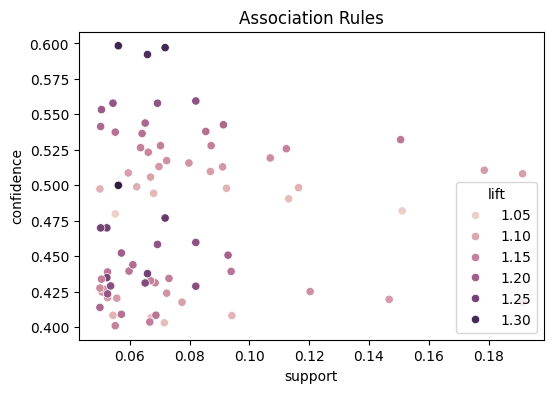

In [15]:
# Visualize Results

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x="support", y="confidence", data=filtered_rules, hue="lift")
plt.title("Association Rules")
plt.show()